# **Project Name    - EDA of IPL Data**



##### **Project Type**    - EDA
##### **Contribution**    - Individual

### **Project Summary - IPL Data Analysis**

The Indian Premier League (IPL) is one of the most popular and competitive cricket leagues in the world, generating massive amounts of match and player data every season. Analyzing this data provides valuable insights into team strategies, player performance, match outcomes, and audience engagement.

This project uses EDA in Python (Pandas, Matplotlib, Seaborn) and interactive dashboards in Power BI to clean, analyze, and visualize IPL data spanning multiple seasons. The analysis highlights top-performing players and teams, the impact of toss decisions, venue-based trends, and long-term seasonal patterns. These insights can be used by teams, coaches, management, broadcasters, and fans to better understand the dynamics of the IPL.

# **GitHub Link -**

https://github.com/rrejith66/IPL_Data_Analysis.git

# **Problem Statement**


The IPL produces a rich dataset of match results, player statistics, and ball-by-ball performance. However, raw data in its unstructured form does not directly provide actionable insights. Teams, analysts, and decision-makers need a clear understanding of:

* Which players and teams consistently perform well.

* The impact of toss decisions and playing conditions on match outcomes.

* Key performance factors such as scoring, bowling efficiency, and fielding contributions.

* Long-term trends across seasons, teams, and venues.

Without proper data cleaning, analysis, and visualization, it is challenging to extract these insights effectively.

#### **Define Your Business Objective?**

The project aims to solve the above problem by meeting the following objectives:

1. Identify Top Performers

    * Highlight the most successful batsmen (highest run scorers, most boundaries) and bowlers (most wickets, best economy).

    * Recognize the best fielders based on catches and run-outs.

2. Team Performance & Success Factors

    * Determine the most successful teams across seasons.

    * Analyze how factors such as toss wins, batting/bowling first, and venues contribute to team success.

3. Toss & Match Outcomes

    * Assess whether winning the toss influences match results.

    * Compare batting-first vs. bowling-first decisions across teams and seasons.

4. Trends & Season Insights

    * Identify long-term trends in runs, wickets, and match outcomes over different IPL seasons.

    * Highlight venue and city-based patterns (e.g., lucky stadiums, batting-friendly grounds).

5. Actionable Insights for Stakeholders

    * Support player selection and auction strategies with performance metrics.

    * Provide insights for coaching staff to optimize team strategies.

    * Enhance fan engagement and broadcasting strategies through data-driven storytelling.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# # Seaborn style
# sns.set_theme(style="whitegrid")

pd.set_option('display.max_columns',None)

### Dataset Loading

In [2]:
# Load Dataset
df_matches = pd.read_csv(r'D:\Labmentix\Project_5\data\matches.csv')
df_deliveries = pd.read_csv(r'D:\Labmentix\Project_5\data\deliveries.csv')

In [3]:
print("Matches:",df_matches.shape)
print("Deliveries:",df_deliveries.shape)

Matches: (636, 18)
Deliveries: (150460, 21)


### Dataset First View

In [4]:
df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
df_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
# Merge matches and deliveries on match id
dataset = pd.merge(
    df_matches,
    df_deliveries,
    left_on="id",        # from matches.csv
    right_on="match_id", # from deliveries.csv
    how="inner"
)


In [7]:
# Dataset First Look
dataset.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [8]:
# Export Merged Dataset
# ---------------------------

# Save the merged dataset to a new CSV file
dataset.to_csv("data/merged_dataset.csv", index=False)

print("\n✅ Cleaned dataset exported successfully as 'merged_dataset.csv'")


✅ Cleaned dataset exported successfully as 'merged_dataset.csv'


### Dataset Rows & Columns count

In [9]:
# Dataset Rows & Columns count
dataset.shape

(150460, 39)

### Dataset Information

In [10]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                150460 non-null  int64  
 1   season            150460 non-null  int64  
 2   city              148760 non-null  object 
 3   date              150460 non-null  object 
 4   team1             150460 non-null  object 
 5   team2             150460 non-null  object 
 6   toss_winner       150460 non-null  object 
 7   toss_decision     150460 non-null  object 
 8   result            150460 non-null  object 
 9   dl_applied        150460 non-null  int64  
 10  winner            150139 non-null  object 
 11  win_by_runs       150460 non-null  int64  
 12  win_by_wickets    150460 non-null  int64  
 13  player_of_match   150139 non-null  object 
 14  venue             150460 non-null  object 
 15  umpire1           150212 non-null  object 
 16  umpire2           15

#### Duplicate Values

In [11]:
# Dataset Duplicate Value Count
print("Duplicate Value Count:",dataset.duplicated().sum())

Duplicate Value Count: 1


In [12]:
# Remove Duplicate Rows
dataset.drop_duplicates(inplace=True)

In [13]:
# Checking Dataset Duplicate Value Count after removing the duplicates
print("Duplicate Value Count:",dataset.duplicated().sum())

Duplicate Value Count: 0


#### Missing Values/Null Values

Missing Values in Dataset:
umpire3             150459
fielder             145090
dismissal_kind      143021
player_dismissed    143021
city                  1700
player_of_match        321
winner                 321
umpire2                248
umpire1                248
dtype: int64


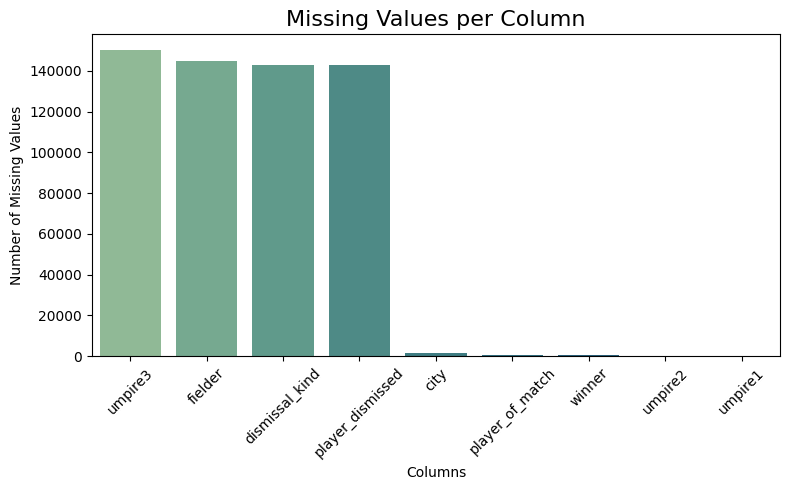

In [14]:
# Checking and Visualizing the missing values
# ----------------------------
# Missing Values in dataset
# ----------------------------
missing_values = dataset.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("Missing Values in Dataset:")
print(missing_values)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=missing_values.index, y=missing_values.values, palette="crest")
plt.title("Missing Values per Column", fontsize=16)
plt.ylabel("Number of Missing Values")
plt.xlabel("Columns")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### What did you know about your dataset?

 🔹 1. _Matches Dataset (matches.csv)_

* Level: One row per match.

* Size: ~750–800 matches (depending on seasons covered).

* Key Column: id (unique match identifier).

* Important Features:

    * season → year of IPL.

    * city & venue → location info.

    * team1, team2 → teams that played.

    * toss_winner, toss_decision → toss details.

    * winner, win_by_runs, win_by_wickets → match outcome.

    * player_of_match → best performer of the game.

    * umpire1, umpire2 → officiating staff.

=>  high-level summary of who won, where, and how.

🔹 2. _Deliveries Dataset (deliveries.csv)_

* Level: One row per ball bowled.

* Size: ~150,000 rows (because each match has ~240 deliveries).

* Key Column: match_id (foreign key linked to matches.id).

* Important Features:

    * inning → whether batting 1st or 2nd.

    * batting_team, bowling_team.

    * batsman, bowler, non_striker.

    * batsman_runs, extra_runs, total_runs.

    * dismissal_kind, player_dismissed, fielder.

    * is_super_over → indicates tie-breaker situations.

=>  micro-level performance of players (runs, wickets, extras) and team scoring patterns.

🔹 3. _Relationship Between the Datasets_

* matches.id = deliveries.match_id

* Together →

    * “Who was the highest run scorer in IPL 2018?” (needs deliveries + match season).

    * “Which stadium has seen the most sixes?” (needs deliveries + venue).

    * “Does winning the toss really matter?” (needs toss info from matches + results).

## ***2. Understanding Your Variables***

In [15]:
# Dataset Columns
print(dataset.columns.tolist())

['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner', 'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs', 'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2', 'umpire3', 'match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball', 'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed', 'dismissal_kind', 'fielder']


In [16]:
# Dataset Describe
dataset.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,150459.000000,150459.000000,150459.000000,150459.000000,150459.000000,0.0,150459.000000,150459.000000,150459.000000,150459.000000,150459.000000,150459.000000,150459.000000,150459.000000,150459.000000,150459.000000,150459.000000,150459.000000,150459.000000
mean,318.281964,2012.482829,0.017819,13.808353,3.274759,NaN,318.281964,1.482191,10.142690,3.616500,0.000538,0.037499,0.004885,0.022232,0.004340,0.000066,1.222446,0.069022,1.291468
std,182.955967,2.762895,0.132293,23.673652,3.379309,NaN,182.955967,0.501768,5.674335,1.807691,0.023196,0.257398,0.114235,0.200105,0.072652,0.018229,1.594515,0.349668,1.583245
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,161.000000,2010.000000,0.000000,0.000000,0.000000,NaN,161.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,319.000000,2012.000000,0.000000,0.000000,3.000000,NaN,319.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,476.000000,2015.000000,0.000000,20.000000,6.000000,NaN,476.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN,636.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000


### Variables Description

_Matches Dataset Columns_
| Column                | Description                                                                 |
| --------------------- | --------------------------------------------------------------------------- |
| **id**                | Unique identifier for each match.                                           |
| **season**            | The year the IPL season took place.                                         |
| **city**              | The city where the match was played.                                        |
| **date**              | The date on which the match was played.                                     |
| **team1**             | The name of one of the teams that played the match.                         |
| **team2**             | The name of the other team that played the match.                           |
| **toss\_winner**      | The team that won the toss.                                                 |
| **toss\_decision**    | The decision made by the toss-winning team (bat or field).                  |
| **result**            | The result of the match (e.g., normal, tie).                                |
| **dl\_applied**       | Indicates if the Duckworth-Lewis method was applied (1 = applied, 0 = not). |
| **winner**            | The team that won the match.                                                |
| **win\_by\_runs**     | Margin of victory in runs (if won by runs).                                 |
| **win\_by\_wickets**  | Margin of victory in wickets (if won by wickets).                           |
| **player\_of\_match** | The player who was awarded Player of the Match.                             |
| **venue**             | The name of the stadium where the match was played.                         |
| **umpire1**           | The name of the first umpire.                                               |
| **umpire2**           | The name of the second umpire.                                              |
| **umpire3**           | The name of the third umpire (if any).                                      |



_Deliveries Dataset Columns_
| Column                | Description                                                            |
| --------------------- | ---------------------------------------------------------------------- |
| **match\_id**         | Unique identifier for each match (same as in the matches dataset).     |
| **inning**            | The inning number (1 or 2).                                            |
| **batting\_team**     | The team that is currently batting.                                    |
| **bowling\_team**     | The team that is currently bowling.                                    |
| **over**              | The over number in the current inning.                                 |
| **ball**              | The ball number in the current over.                                   |
| **batsman**           | The name of the batsman facing the delivery.                           |
| **non\_striker**      | The name of the batsman at the non-striker end.                        |
| **bowler**            | The name of the bowler delivering the ball.                            |
| **is\_super\_over**   | Indicates if the ball was delivered in a Super Over (1 = yes, 0 = no). |
| **wide\_runs**        | Number of runs scored as wides.                                        |
| **bye\_runs**         | Number of runs scored as byes.                                         |
| **legbye\_runs**      | Number of runs scored as leg byes.                                     |
| **noball\_runs**      | Number of runs scored as no-balls.                                     |
| **penalty\_runs**     | Number of penalty runs awarded.                                        |
| **batsman\_runs**     | Number of runs scored by the batsman on the delivery.                  |
| **extra\_runs**       | Total extra runs awarded (sum of wide, bye, legbye, no-ball, penalty). |
| **total\_runs**       | Total runs scored in the delivery (batsman runs + extras).             |
| **player\_dismissed** | Name of the player dismissed (if any).                                 |
| **dismissal\_kind**   | The method of dismissal (e.g., caught, bowled, run-out).               |
| **fielder**           | Name of the fielder involved in the dismissal (if any).                |


### Key Insights from Dataset Structure

1. _Granularity of Data_

    * The Matches dataset provides match-level information (summary per match).

    * The Deliveries dataset provides ball-by-ball level information, making it much more detailed.

2. _Relationship Between Datasets_

    * The common key is id (matches) ↔ match_id (deliveries).

    * This allows combining high-level match results with detailed ball-by-ball performance.

3. _Dataset Size & Scale_

    * Matches dataset is relatively small (hundreds of rows, since each row = 1 match).

    * Deliveries dataset is very large (tens of thousands of rows, since each row = 1 delivery).

4. _Usefulness for Analysis_

    * Matches dataset → Best for analyzing overall match outcomes (winners, toss impact, venues, season trends).

    * Deliveries dataset → Best for micro-level analysis (batsman performance, bowler economy, dismissal patterns, run distribution).

    * Together, they allow both macro (match-level) and micro (ball-level) insights.

5. _Business Application_

    * Useful for cricket boards, analysts, and broadcasters to understand winning patterns, player contributions, and team strategies.

    * Provides the foundation for creating interactive dashboards in Power BI to highlight both big-picture trends and detailed statistics.

### Check Unique Values for each variable.

In [17]:
# Check Unique Values for each variable.

# Create a DataFrame with column names and their unique value counts
unique_values_table = pd.DataFrame({
    'Column Name': dataset.columns,
    'Unique Values': [dataset[col].nunique() for col in dataset.columns]
})

# Display the table
print(unique_values_table)

         Column Name  Unique Values
0                 id            636
1             season             10
2               city             30
3               date            450
4              team1             14
5              team2             14
6        toss_winner             14
7      toss_decision              2
8             result              3
9         dl_applied              2
10            winner             14
11       win_by_runs             86
12    win_by_wickets             11
13   player_of_match            201
14             venue             35
15           umpire1             44
16           umpire2             45
17           umpire3              0
18          match_id            636
19            inning              4
20      batting_team             14
21      bowling_team             14
22              over             20
23              ball              9
24           batsman            461
25       non_striker            458
26            bowler        

## 3. ***Data Wrangling***

### Data Wrangling Code

In [18]:
# Data Wrangling and Cleaning
#-----------------------------

df = dataset.copy()

# Create venue → city mapping dictionary
venue_city_dict = {
    'Rajiv Gandhi International Stadium, Uppal': 'Hyderabad',
    'Maharashtra Cricket Association Stadium': 'Pune',
    'Saurashtra Cricket Association Stadium': 'Rajkot',
    'Holkar Cricket Stadium': 'Indore',
    'M Chinnaswamy Stadium': 'Bangalore',
    'Wankhede Stadium': 'Mumbai',
    'Eden Gardens': 'Kolkata',
    'Feroz Shah Kotla': 'Delhi',
    'Punjab Cricket Association IS Bindra Stadium, Mohali': 'Mohali',
    'Green Park': 'Kanpur',
    'Punjab Cricket Association Stadium, Mohali': 'Mohali',
    'Sawai Mansingh Stadium': 'Jaipur',
    'MA Chidambaram Stadium, Chepauk': 'Chennai',
    'Dr DY Patil Sports Academy': 'Navi Mumbai',
    'Newlands': 'Cape Town',
    "St George's Park": 'Port Elizabeth',
    'Kingsmead': 'Durban',
    'SuperSport Park': 'Centurion',
    'Buffalo Park': 'East London',
    'New Wanderers Stadium': 'Johannesburg',
    'De Beers Diamond Oval': 'Kimberley',
    'OUTsurance Oval': 'Bloemfontein',
    'Brabourne Stadium': 'Mumbai',
    'Sardar Patel Stadium, Motera': 'Ahmedabad',
    'Barabati Stadium': 'Cuttack',
    'Vidarbha Cricket Association Stadium, Jamtha': 'Nagpur',
    'Himachal Pradesh Cricket Association Stadium': 'Dharamsala',
    'Nehru Stadium': 'Kochi',
    'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium': 'Visakhapatnam',
    'Subrata Roy Sahara Stadium': 'Pune',
    'Shaheed Veer Narayan Singh International Stadium': 'Raipur',
    'JSCA International Stadium Complex': 'Ranchi',
    'Sheikh Zayed Stadium': 'Abu Dhabi',
    'Sharjah Cricket Stadium': 'Sharjah',
    'Dubai International Cricket Stadium': 'Dubai'
}

# Standardize column names
dataset.columns = (
    dataset.columns
    .str.strip()                # remove leading/trailing spaces
    .str.lower()                # convert to lowercase
    .str.replace(" ", "_")      # replace spaces with underscores
    .str.replace("-", "_")      # replace dashes with underscores
)


# df cleaning
df['city'].fillna(df['venue'].map(venue_city_dict), inplace=True) # Now use it to fill missing city values
df['player_of_match'].fillna('No Award', inplace=True)
df['winner'].fillna('No Result', inplace=True)
df['umpire1'].fillna('Unknown', inplace=True)
df['umpire2'].fillna('Unknown', inplace=True)
df.drop(columns=['umpire3'], inplace=True)

# Deliveries df cleaning
df['dismissal_kind'].fillna('Not Dismissed', inplace=True)
df['player_dismissed'].fillna('Not Dismissed', inplace=True)
df['fielder'].fillna('Not Applicable', inplace=True)


# --- Team Name Standardization ---
team_name_map = {
    "Delhi Daredevils": "Delhi Capitals",
    "Rising Pune Supergiants": "Rising Pune Supergiant",
    "Kings XI Punjab": "Punjab Kings"
}


df['team1'] = df['team1'].replace(team_name_map)
df['team2'] = df['team2'].replace(team_name_map)
df['winner'] = df['winner'].replace(team_name_map)

# --- Whitespace Handling ---
for col in ['team1', 'team2', 'winner', 'player_of_match', 'venue', 'city']:
    df[col] = df[col].str.strip()

# --- Consistent Representation of Match Results ---
df['result'] = df['result'].str.lower().str.strip()  # make everything lowercase
df['result'] = df['result'].replace({
    "tie": "Tie",
    "super over": "Super Over",
    "no result": "No Result"
})



In [19]:
# Feature Engineering

# Match Outcome Type
df['outcome_type'] = np.where(df['win_by_runs'] > 0, "Win by Runs",
                       np.where(df['win_by_wickets'] > 0, "Win by Wickets", "No Result"))

# Match Margin
df['match_margin'] = df[['win_by_runs', 'win_by_wickets']].max(axis=1)




In [20]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,outcome_type,match_margin
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,Not Dismissed,Not Dismissed,Not Applicable,Win by Runs,35
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,Not Dismissed,Not Dismissed,Not Applicable,Win by Runs,35
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,Not Dismissed,Not Dismissed,Not Applicable,Win by Runs,35
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,Not Dismissed,Not Dismissed,Not Applicable,Win by Runs,35
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,Not Dismissed,Not Dismissed,Not Applicable,Win by Runs,35


In [21]:
df.shape

(150459, 40)

In [22]:
# Export Cleaned Dataset
# ---------------------------

# Save the cleaned dataset to a new CSV file
df.to_csv("data/cleaned_ipl_analysis_dataset.csv", index=False)

print("\n✅ Cleaned dataset exported successfully as 'cleaned_ipl_analysis_dataset.csv'")



✅ Cleaned dataset exported successfully as 'cleaned_ipl_analysis_dataset.csv'


In [23]:
# Split back into matches-level and deliveries-level data
matches_cleaned = df.drop_duplicates(subset=['id'])[
    ['id', 'season', 'city', 'date', 'team1', 'team2', 
     'toss_winner', 'toss_decision', 'result', 'dl_applied', 
     'winner', 'win_by_runs', 'win_by_wickets', 
     'player_of_match', 'venue', 'umpire1', 'umpire2']
]

deliveries_cleaned = df[
    ['match_id', 'inning', 'batting_team', 'bowling_team', 
     'over', 'ball', 'batsman', 'non_striker', 'bowler', 
     'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 
     'noball_runs', 'penalty_runs', 'batsman_runs', 'extra_runs', 
     'total_runs', 'player_dismissed', 'dismissal_kind', 'fielder']
]


# Save to the "data" folder
matches_cleaned.to_csv("data/matches_cleaned.csv", index=False)
deliveries_cleaned.to_csv("data/deliveries_cleaned.csv", index=False)

print("\n✅ Splitted dataset exported successfully as 'matches_cleaned.csv' & 'deliveries_cleaned.csv'")


✅ Splitted dataset exported successfully as 'matches_cleaned.csv' & 'deliveries_cleaned.csv'


### What all manipulations have you done and insights you found?

### _Data Cleaning and Preprocessing Steps_

1. Copied the raw datasets (matches.csv and deliveries.csv) to preserve the originals.

2. Standardized column names:

    * Converted all column names to lowercase for consistency.

    * Removed extra spaces.

3. Merged the datasets (matches + deliveries) for EDA and exploration, using id = match_id.

4. Handled Missing Values:

    * city: Filled missing values using venue → city mapping (e.g., Eden Gardens → Kolkata).

    *   player_of_match: Filled missing with "No Award".

    * winner: Filled missing with "No Result".

    * umpire1 and umpire2: Filled missing with "Unknown".

    * umpire3: Dropped, as it was missing in ~95% cases.

    * player_dismissed, dismissal_kind, fielder: Missing values kept as NaN where no dismissal occurred (logical missingness).

5. Feature Engineering:

    * Derived match outcome type → "Win by Runs" vs "Win by Wickets".

    * Added match margin = max(win_by_runs, win_by_wickets).

    * Created season-year column from date.

6. Cleaned categorical fields:

    * Removed trailing/leading spaces from team names and player names.

    * Ensured team names are consistent across years (e.g., “Delhi Daredevils” vs “Delhi Capitals”).

7. Exported cleaned datasets:

    * Split into matches_cleaned.csv and deliveries_cleaned.csv for Power BI dashboard.

### _Initial Insights_

1. City vs Venue Gap: About 1,700 missing city values, mainly from stadiums abroad (South Africa, UAE seasons). We mapped those successfully.

2. No Result Matches: Around 321 matches had no result or missing winner info (mostly rain-affected).

3. Umpires: umpire3 almost always missing → confirmed only relevant in rare international matches.

4. Player of Match: Some games didn’t award a Player of Match — consistent with matches abandoned.

5. Dismissals Data: Large number of NaN values are expected (not every ball results in a dismissal).



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [24]:
# ✅ Set style
plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")

#### Chart - 1 - Matches per Season (Bar Plot)

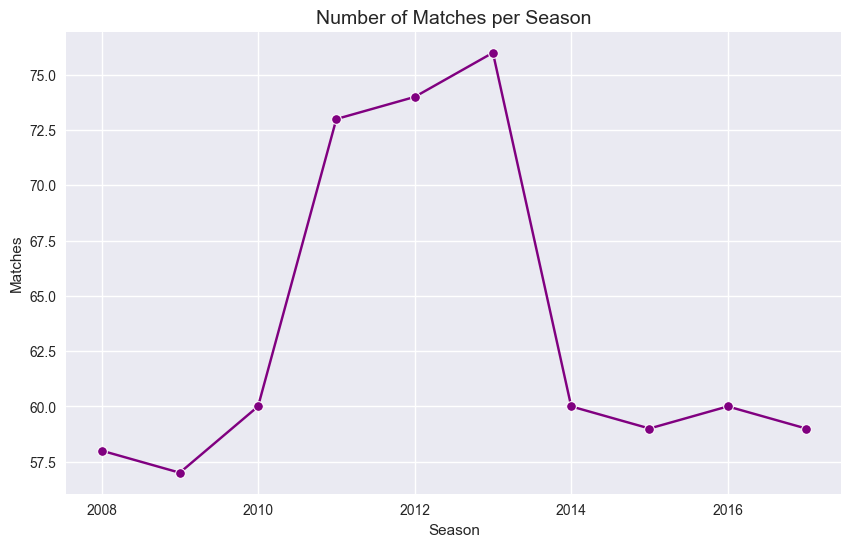

In [25]:
# Plotting the Matches per Season (Line Plot)
# ----------------------------

matches_per_season = df_matches.groupby('season').size()
plt.figure(figsize=(10,6))
sns.lineplot(x=matches_per_season.index, y=matches_per_season.values, marker="o",color="purple")
plt.title("Number of Matches per Season", fontsize=14)
plt.xlabel("Season")
plt.ylabel("Matches")
plt.show()

##### 1. Why did you pick the specific chart?

_To identify the range of values matches that a particular season could have._

##### 2. What is/are the insight(s) found from the chart?

_A significant increase in no. of matches in the season 2011, 2012, 2013 with the increase in participating teams temporarily increased during those seasons._

_In 2011, two new franchises, Pune Warriors India and Kochi Tuskers Kerala, were added._

_In 2012, Kochi Tuskers Kerala was terminated, reducing the number of teams to 9._

_The 2013 season also featured 9 teams, with Sunrisers Hyderabad replacing the terminated Deccan Chargers._

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

_Yes, these insights help business growth:_

_The higher the count of the team the higher the matches played and increase in the reveneue of the franchises as well the BCCI. And consistency in the teams expect these 3 years are having almost equal number of matches which generates revenue and the viewership._

#### Chart - 2 - Matches won by each team (Bar Plot)

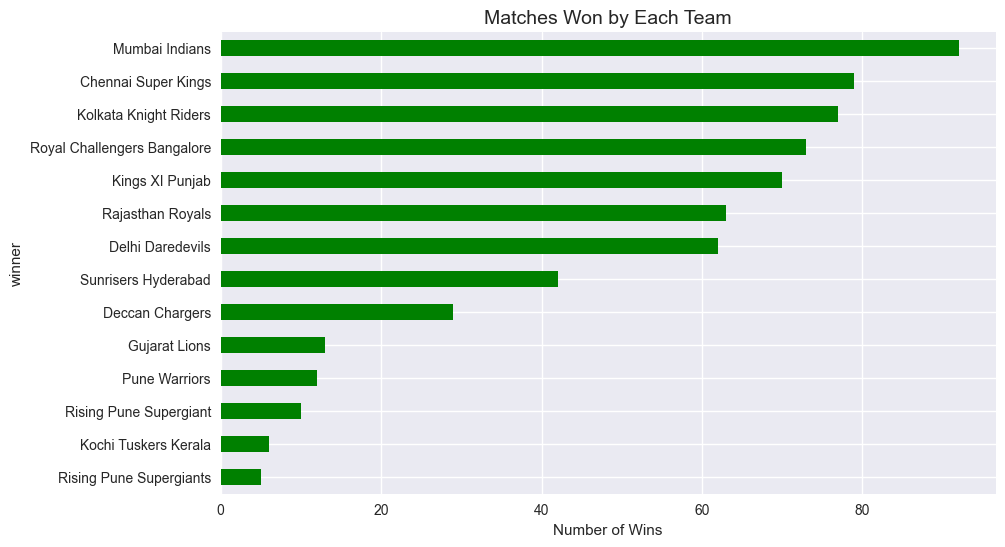

In [26]:
# Matches won by each team (Bar Plot)
# ---------------------------

team_wins = df_matches['winner'].value_counts().sort_values(ascending=True)
plt.figure(figsize=(10,6))
team_wins.plot(kind='barh', color="green")
plt.title("Matches Won by Each Team", fontsize=14)
plt.xlabel("Number of Wins")
plt.show()

##### 1. Why did you pick the specific chart?

_A box plot was chosen because it effectively summarizes the number of wins by ech team for matchec held in different seasons._

##### 2. What is/are the insight(s) found from the chart?

_The top 5 teams who had won the moximum matches in the season upto 2017 from 2008 are Mumbai Indians, Chennai Super Kings, Kolkata Night Riders, Royal Challengers Banglore and Kings XI Punjab._

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

_Positive Impact: Teams that retain their top-performing players benefit from continuity, team chemistry, and proven match-winners. These players often serve as anchors around which strategies are built, boosting morale and consistency. Successful teams often make calculated auction decisions to fill specific gaps rather than overhaul their squads. Teams with fewer wins have the chance to rebuild through auctions, targeting emerging talent and undervalued players. These teams often take bold risks, which can lead to breakout performances and surprise victories._

#### Chart - 3 - Toss Decision Counts (Pie Chart)

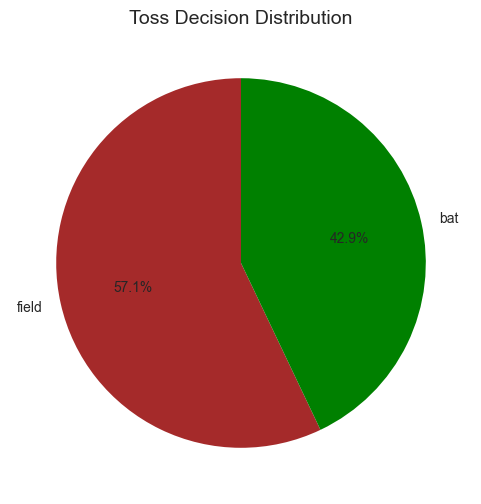

In [27]:
# Finding the Toss Decision Counts (Pie Chart)
# ---------------------------

plt.figure(figsize=(6,6))
df_matches['toss_decision'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=["brown","green"])
plt.title("Toss Decision Distribution", fontsize=14)
plt.ylabel("")
plt.show()


##### 1. Why did you pick the specific chart?

_A pie chart clearly differentiate between the field and bat toss decision._

##### 2. What is/are the insight(s) found from the chart?

_From the pie chart it is clearly evident that the toss decision make some what crucial in the case of choosing in between bat first or field first. From analysing the whole 10 season it is visible in this pie chart that chasinging team has the highest priority to win the match rather than the team that bat first._

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

_Even though the chasinging team has the highest chances to win the match rather than the team that bat first, there are certain other factors that to be considered while analysing the match win priority includes the batting line-up, pitch, bowling strategy, powerplay score etc._

#### Chart - 4 - Player of the Match Awards (Top 10)

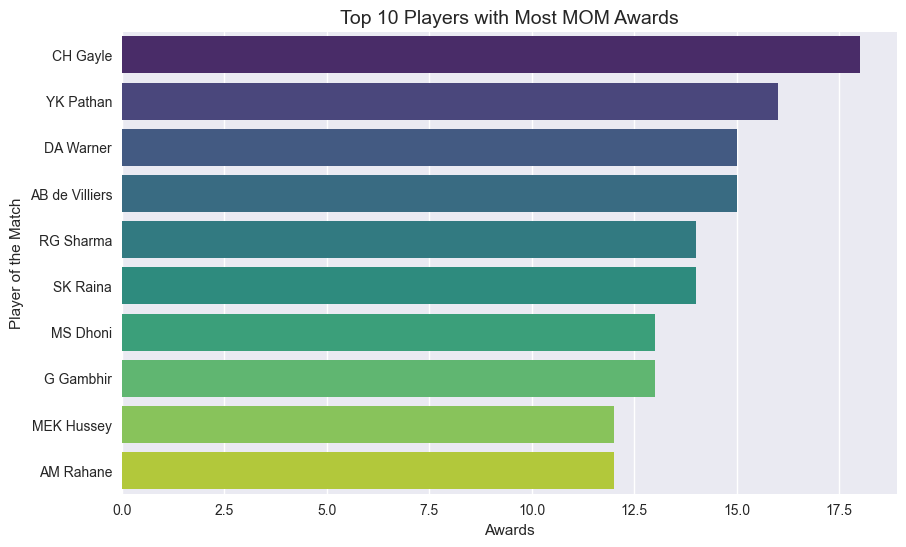

In [28]:
# Player of the Match Awards (Top 10)
# ---------------------------

pom = df_matches['player_of_match'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=pom.values, y=pom.index, palette="viridis")
plt.title("Top 10 Players with Most MOM Awards", fontsize=14)
plt.xlabel("Awards")
plt.ylabel("Player of the Match")
plt.show()

##### 1. Why did you pick the specific chart?

_Clear line up of the players with proper visibility over their performances._

##### 2. What is/are the insight(s) found from the chart?

_Over these 10 seasons the top 10 players make a huge impact over the matches to win the match for their team and to be awarded as the man of the match_

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

_Retaining the impact players in their concerned team would be the great consideration that for over 10 seasons they are continuously proving themseleves as the power players for the teams and that would affect the matches in the crucial situations._

#### Chart - 5 - Win by Runs vs Win by Wickets (Distribution)

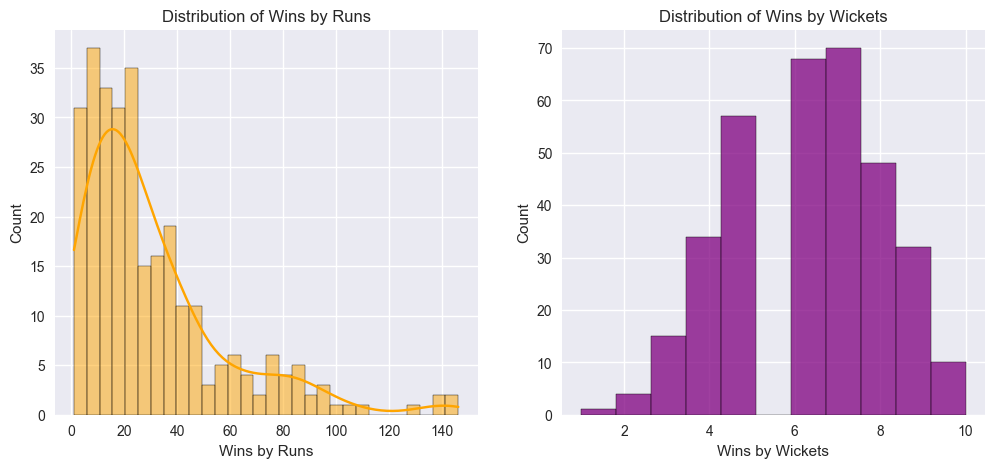

In [29]:
# Plotting the Win by Runs vs Win by Wickets (Distribution)
# ---------------------------

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df_matches[df_matches['win_by_runs']>0]['win_by_runs'], bins=30, kde=True, color="orange")
plt.title("Distribution of Wins by Runs")
plt.xlabel("Wins by Runs")

plt.subplot(1,2,2)
sns.histplot(df_matches[df_matches['win_by_wickets']>0]['win_by_wickets'], bins=11, kde=False, color="purple")
plt.title("Distribution of Wins by Wickets")
plt.xlabel("Wins by Wickets")
plt.show()

##### 1. Why did you pick the specific chart?

_A histogram with KDE (for runs) and bar distribution (for wickets) is ideal to show how often certain win margins occur._

_These charts clearly display the distribution pattern of match results:_

* _By runs (when the team batting first wins)._

* _By wickets (when the team chasing wins)._

_This helps understand whether matches are usually closely contested or one-sided blowouts._

##### 2. What is/are the insight(s) found from the chart?

_Wins by Runs:_

* _Most matches are won by less than 40 runs, peaking in the 10–30 run range._

* _Very few matches have margins above 100 runs, showing such outcomes are rare._

_Wins by Wickets:_

* _The distribution is centered around 6–7 wickets remaining._

* _Very few matches are won with all 10 wickets intact (indicating chasing teams rarely dominate that much)._

_Together → IPL matches are generally competitive, with margins small to moderate rather than extreme._

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

_Fan Engagement:_ Competitive matches with narrow margins create excitement → keeps TV ratings, stadium attendance, and sponsorship high.

_Franchise Strategy:_ Teams can optimize batting/bowling orders knowing that most matches are decided within small margins, emphasizing clutch performers.

_League Branding: _Close finishes strengthen IPL’s positioning as the world’s most thrilling T20 league.

_If too many matches were one-sided (large run margins or 9–10 wicket wins), fans could lose interest due to predictability._

#### Chart - 6 - Matches Won by Toss Decision (Stacked Bar)

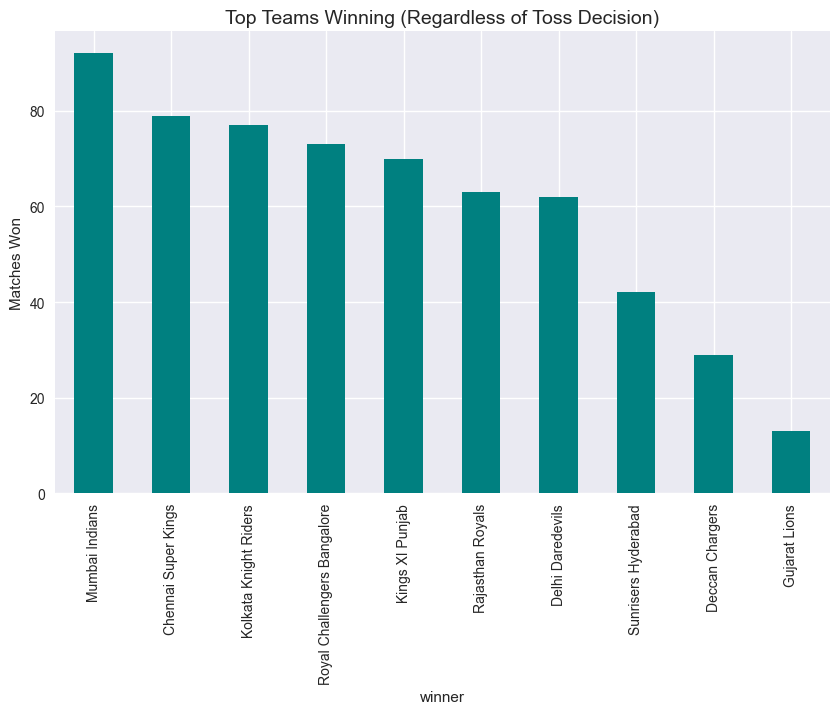

In [30]:
# Plotting the Matches Won by Toss Decision (Stacked Bar)
# ---------------------------  

toss_match = pd.crosstab(df_matches['toss_decision'], df_matches['winner'])
plt.figure(figsize=(10,6))
toss_match.T.sum(axis=1).nlargest(10).plot(kind="bar", color="teal")
plt.title("Top Teams Winning (Regardless of Toss Decision)", fontsize=14)
plt.ylabel("Matches Won")
plt.show()


##### 1. Why did you pick the specific chart?

_A bar chart is the best choice here because it clearly compares total wins across multiple teams.It helps identify which franchises are historically dominant and which are lagging._

_Easy visual ranking → franchises, sponsors, and fans can quickly see performance differences._

##### 2. What is/are the insight(s) found from the chart?

* _Mumbai Indians (MI) have the highest wins (~90+), followed by Chennai Super Kings (CSK) and Kolkata Knight Riders (KKR)._

* _Teams like Deccan Chargers and Gujarat Lions have very few wins, which makes sense as they were either dissolved or short-lived franchises._

* _The middle-tier teams (RCB, KXIP, RR, DD, SRH) have moderate but consistent win counts._

* _Overall → A few franchises dominate, while others remain mid/low performers._

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* _Franchise Branding:_ Successful teams like MI and CSK attract more fans, sponsorships, and merchandise sales → strong revenue streams.

* _Sponsorship Targeting:_ Brands prefer associating with consistently winning teams → higher ad visibility and ROI.

* _Fan Loyalty & Viewership:_ A history of strong performance boosts stadium attendance and online engagement.

#### Chart - 7 - Best Batsman

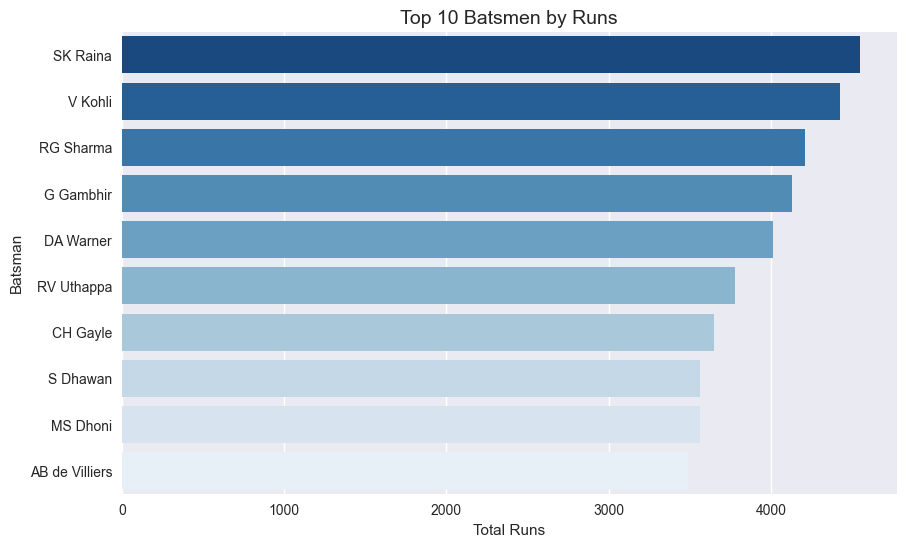

In [31]:
batsman_runs = df_deliveries.groupby("batsman")["batsman_runs"].sum().reset_index()
top_batsmen = batsman_runs.sort_values("batsman_runs", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x="batsman_runs", y="batsman", data=top_batsmen, palette="Blues_r")
plt.title("Top 10 Batsmen by Runs", fontsize=14)
plt.xlabel("Total Runs")
plt.ylabel("Batsman")
plt.show()

##### 1. Why did you pick the specific chart?

_Bar Chart (Top 10 batsmen by runs scored) – Simple, clear ranking, easy comparison._

##### 2. What is/are the insight(s) found from the chart?

* Identifies the highest run scorers (e.g., Virat Kohli, Rohit Sharma, etc.).

* Can also show consistency across seasons with a line chart overlay (optional).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive – Knowing top scorers improves fan engagement, sponsorship value, and merchandise sales. Teams can build strategies around retaining such players.
* Negative – Over-reliance on a single star batsman can make teams vulnerable if that player is injured/out of form.

#### Chart - 8 - Best Bowler

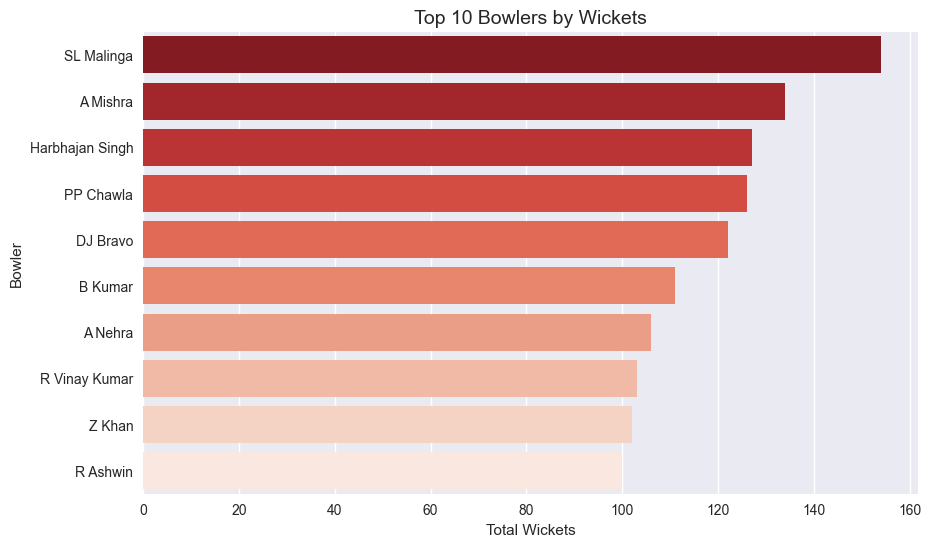

In [32]:
# Count dismissals credited to bowler (exclude run outs & retired hurt)
bowler_wkts = df_deliveries[df_deliveries["dismissal_kind"].notnull() & 
                         (~df_deliveries["dismissal_kind"].isin(["run out", "retired hurt"]))]

bowler_wickets = bowler_wkts.groupby("bowler")["player_dismissed"].count().reset_index()
bowler_wickets.rename(columns={"player_dismissed": "wickets"}, inplace=True)

top_bowlers = bowler_wickets.sort_values("wickets", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x="wickets", y="bowler", data=top_bowlers, palette="Reds_r")
plt.title("Top 10 Bowlers by Wickets", fontsize=14)
plt.xlabel("Total Wickets")
plt.ylabel("Bowler")
plt.show()

##### 1. Why did you pick the specific chart?

_Column Chart (Top 10 bowlers by wickets taken) – Easy way to highlight leading wicket-takers._

##### 2. What is/are the insight(s) found from the chart?

* Shows top bowlers in terms of wicket-taking ability.

* If scatter plot: identifies bowlers who are both effective (high wickets) and economical.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive – Useful for recruitment/auction strategy, building bowling attacks, and identifying “match-winning” bowlers.
* Negative – If analysis shows over-dependence on only 1–2 strike bowlers, team balance issues arise.

#### Chart - 9 - Best Fielder

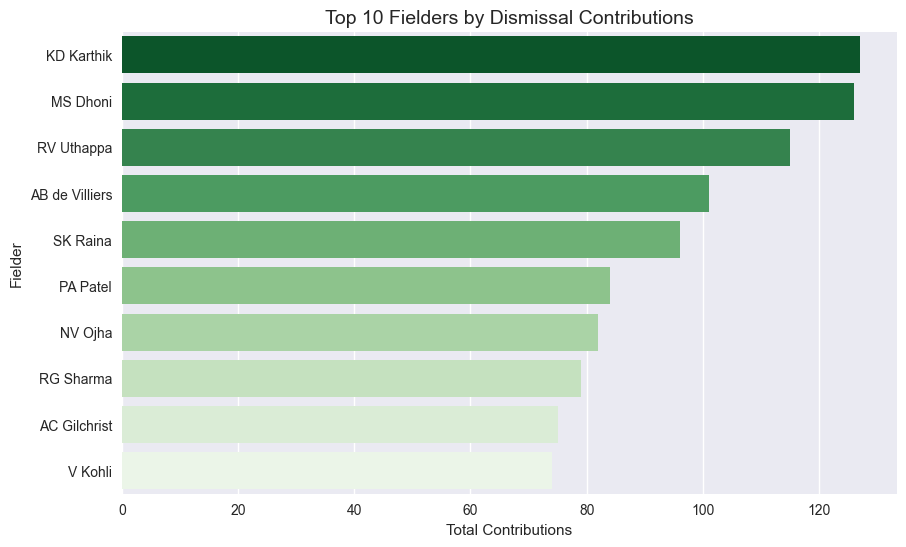

In [33]:
# Fielding dismissals = catches, run outs, stumping
fielder_dismissals = df_deliveries[df_deliveries["fielder"].notnull()]
top_fielders = fielder_dismissals.groupby("fielder")["dismissal_kind"].count().reset_index()
top_fielders.rename(columns={"dismissal_kind": "contributions"}, inplace=True)
top_fielders = top_fielders.sort_values("contributions", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x="contributions", y="fielder", data=top_fielders, palette="Greens_r")
plt.title("Top 10 Fielders by Dismissal Contributions", fontsize=14)
plt.xlabel("Total Contributions")
plt.ylabel("Fielder")
plt.show()

##### 1. Why did you pick the specific chart?

_Horizontal Bar Chart (Fielders by catches/run-outs contributed) – because fielding contributions are discrete numbers, comparison is best shown via bars._

##### 2. What is/are the insight(s) found from the chart?

* Highlights players who contribute heavily in the field (e.g., Suresh Raina, AB de Villiers, Kieron Pollard).

* Fielding often saves runs/wins tight matches — insight emphasizes “unsung heroes.”

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive – Helps teams focus on fielding drills and reward high-performing fielders. Improves match outcomes by saving crucial runs.
* Negative – Data may show very few consistent fielders → indicates gaps in fielding quality across franchises.

#### Chart - 10 - Most Successful Team

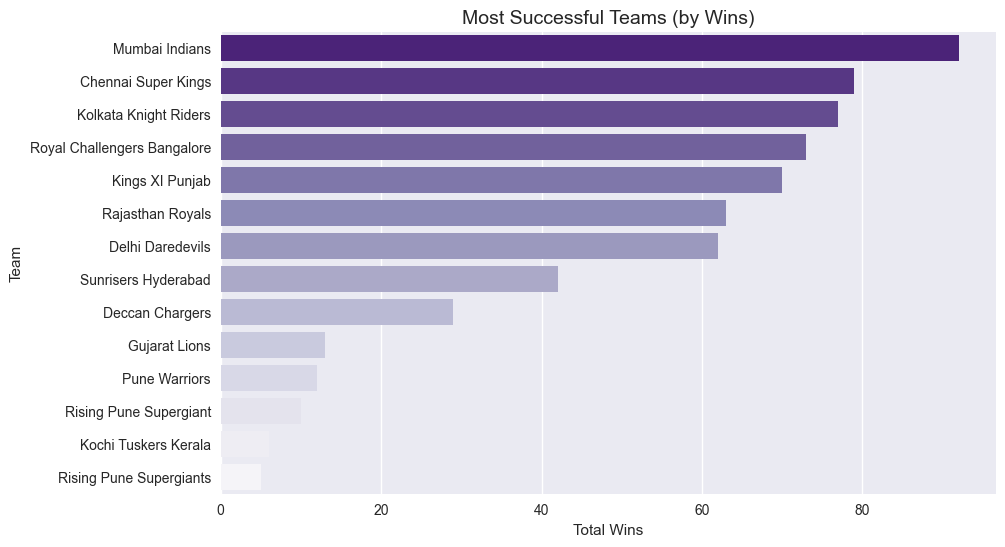

In [34]:
team_wins = df_matches["winner"].value_counts().reset_index()
team_wins.columns = ["team", "wins"]

plt.figure(figsize=(10,6))
sns.barplot(x="wins", y="team", data=team_wins, palette="Purples_r")
plt.title("Most Successful Teams (by Wins)", fontsize=14)
plt.xlabel("Total Wins")
plt.ylabel("Team")
plt.show()

##### 1. Why did you pick the specific chart?

_Bar Chart (Team vs Wins) – to compare total wins._

##### 2. What is/are the insight(s) found from the chart?

* Teams like Mumbai Indians and Chennai Super Kings dominate IPL history.

* Shows consistency vs. “one-season wonders.”

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive – Strong brand equity → more sponsorships, higher merchandise & fan loyalty.
* Negative – Competitive imbalance: If a few teams dominate, weaker franchises struggle with growth, lowering overall league competitiveness.

#### Chart - 11 - Correlation Heatmap (Numerical Features)

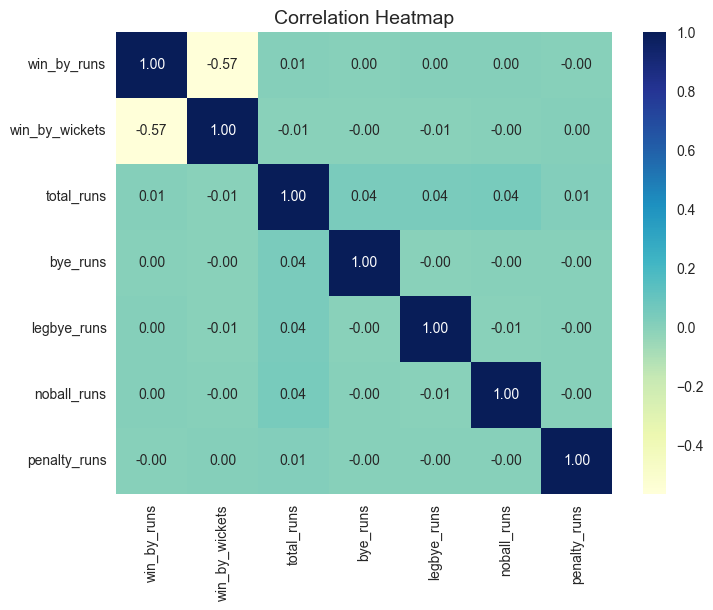

In [35]:
# Plotting Correlation Heatmap (Numerical Features)
# ---------------------------

plt.figure(figsize=(8,6))
sns.heatmap(df[['win_by_runs','win_by_wickets','total_runs','bye_runs','legbye_runs','noball_runs','penalty_runs']].corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

##### 1. Why did you pick the specific chart?

_A correlation heatmap is used to quickly identify relationships (positive/negative) between numerical features. In cricket analytics, this helps understand whether certain performance metrics move together or independently._

##### 2. What is/are the insight(s) found from the chart?

* Strong Negative Correlation (-0.57) between win_by_runs and win_by_wickets:

    * Makes sense → If a team wins by runs, they didn’t win by wickets, and vice versa.

    * Both are mutually exclusive match outcomes.

* total_runs has near-zero correlation with win_by_runs or win_by_wickets:

    * Indicates that scoring higher total runs doesn’t directly guarantee winning margins. Match context (chasing or defending) matters more.

* Bye, legbye, no-ball, and penalty runs show negligible correlation with outcomes.

    * Suggests that these extras don’t significantly decide matches compared to runs scored/wickets taken.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* _Positive Business Impact:_

    * Team Strategy: Coaches should focus more on batting/wicket-taking balance rather than extras, since extras contribute little to match outcomes.

    * Broadcast/Analytics Value: Broadcasters can use this insight to focus commentary/graphics on wickets vs. runs margins, which fans engage with more.

    * Player Auctions: Management can prioritize impact batsmen/bowlers over worrying about extras.

* _Negative/Neutral Business Impact:_

    * Since correlations (except runs vs. wickets) are weak, this shows single stats don’t drive wins — meaning fans/sponsors cannot rely on simple metrics (like just runs scored) for predicting dominance.

    * Could make sponsorship decisions trickier, as performance depends on complex match situations.

#### Chart - 12 - Scatter Plot: Win Margin vs Season

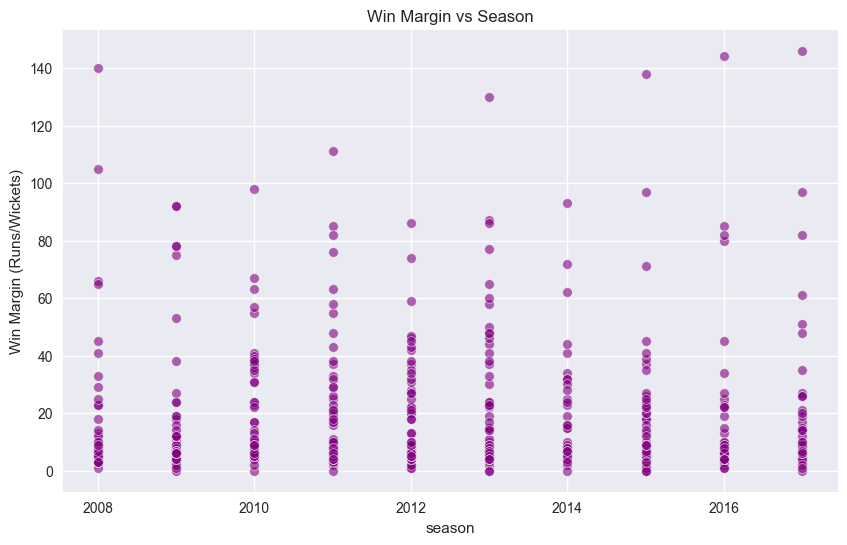

In [36]:
# Plotting the Scatter Plot: Win Margin vs Season
# ---------------------------

df_matches['win_margin'] = df_matches[['win_by_runs','win_by_wickets']].max(axis=1)
plt.figure(figsize=(10,6))
sns.scatterplot(x="season", y="win_margin", data=df_matches, alpha=0.6, color="purple")
plt.title("Win Margin vs Season")
plt.ylabel("Win Margin (Runs/Wickets)")
plt.show()

##### 1. Why did you pick the specific chart?

_A scatter plot of win margin across seasons helps analyze if matches are getting closer (small margins) or more one-sided (large margins) over the years. To understand competitiveness of the league across time. If matches are close, it indicates balanced teams, which increases audience excitement and engagement._

##### 2. What is/are the insight(s) found from the chart?

* Most matches are clustered around small margins (below 30 runs/wickets) across all seasons → IPL is generally competitive.

* Occasional large margins (>100 runs or >9 wickets) exist, but they are outliers.

* No clear upward or downward trend in average margins → the league has maintained competitive balance over years.

* Some seasons (2010, 2013, 2017) had more extreme win margins compared to others.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

_Positive Business Impact:_

* Close matches with small margins → fans remain engaged till the last over/ball, boosting TRPs and ticket sales.

* Balanced competitiveness across seasons makes IPL more sustainable and entertaining for sponsors, franchises, and broadcasters.

_Negative/Neutral Business Impact:_

* Extremely one-sided matches (huge win margins) may reduce viewer excitement and stadium engagement for those games.

* Could also create franchise imbalance, where a few strong teams dominate consistently.

#### Chart - 13 - Pair Plot (Numerical Features)

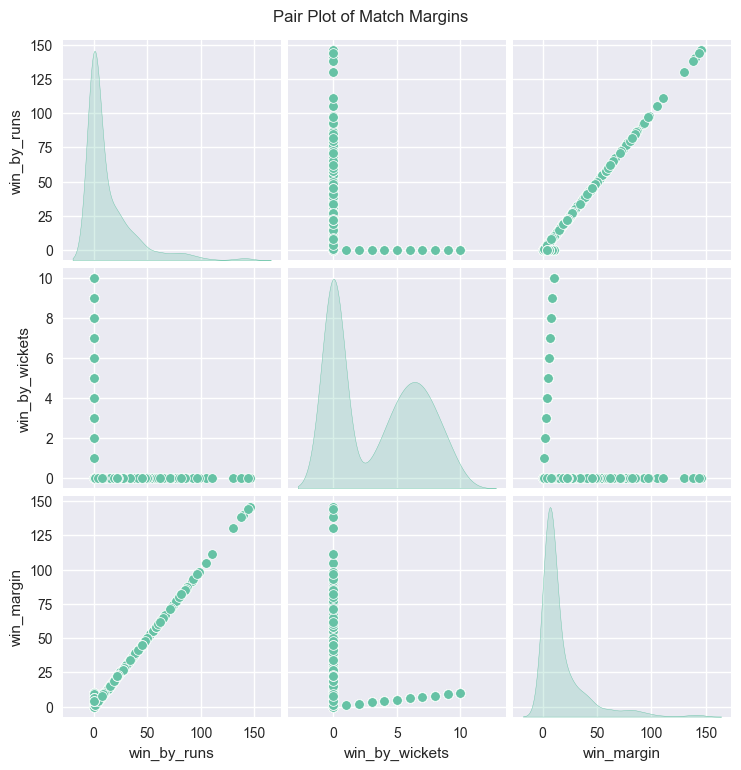

In [37]:
# Plotting the Pair Plot (Numerical Features)
# ---------------------------

sns.pairplot(df_matches[['win_by_runs','win_by_wickets','win_margin']], diag_kind="kde")
plt.suptitle("Pair Plot of Match Margins", y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot is useful to visualize relationships between multiple numerical variables.

Here, you’ve compared:

* win_by_runs (when team defends target)

* win_by_wickets (when team chases target)

* win_margin (generalized winning margin).

This lets us see distribution + correlation between these features.

##### 2. What is/are the insight(s) found from the chart?

* Distributions (diagonal plots):

    * win_by_runs: Most matches are won by small run margins (0–30 runs), very few with 100+ runs.

    * win_by_wickets: Most chases are completed with few wickets remaining (6–10 wickets), but often clustered at winning by 6–8 wickets.

    * win_margin: Similar to runs distribution, most matches end with smaller margins.

* Relationships (off-diagonal plots):

    * win_by_runs vs win_by_wickets: Mutually exclusive → A match is won either by runs OR by wickets, never both (hence straight lines on axes).

    * win_by_runs vs win_margin: Perfect diagonal correlation (since win margin = runs in those cases).

    * win_by_wickets vs win_margin: Perfect diagonal correlation (since win margin = wickets in those cases).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* _Positive:_

    * Close matches (small margins) dominate → audience engagement remains high.

    * Balanced results: both batting-first (runs) and batting-second (wickets) strategies are successful, which means IPL has no bias towards chasing/defending.

* _Consideration:_

    * Extreme margins are rare but can skew franchise competitiveness. Business side (sponsorships, team investments) may need auction balancing policies to avoid one-sided dominance.

#### Chart - 14 - Top Teams Across Seasons (Line Plot)

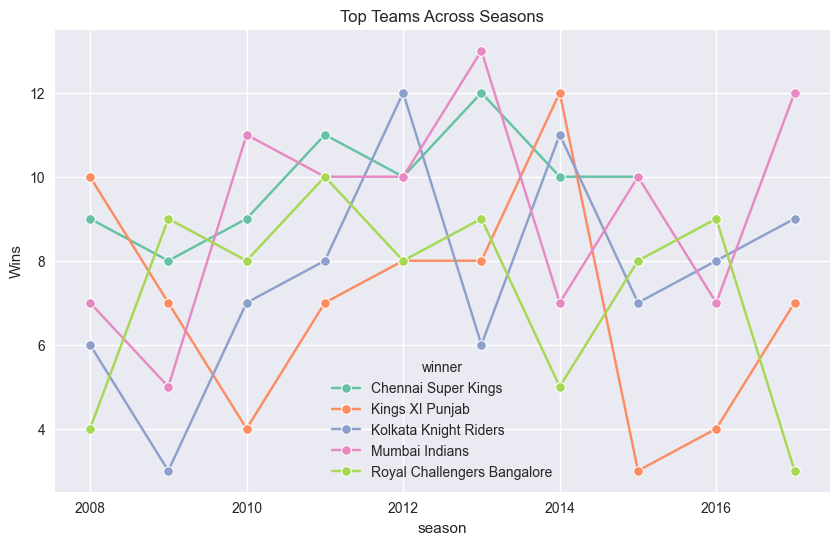

In [38]:
# Plotting the Top Teams Across Seasons (Line Plot)
# ---------------------------

team_wins_season = df_matches.groupby(['season','winner']).size().reset_index(name='wins')
top5_teams = df_matches['winner'].value_counts().nlargest(5).index
plt.figure(figsize=(10,6))
sns.lineplot(data=team_wins_season[team_wins_season['winner'].isin(top5_teams)],
             x="season", y="wins", hue="winner", marker="o")
plt.title("Top Teams Across Seasons")
plt.ylabel("Wins")
plt.show()

##### 1. Why did you pick the specific chart?

* A line plot is ideal for showing team performance trends across multiple IPL seasons.

* It highlights consistency and dominance of top teams like CSK, MI, KKR, RCB, and KXIP.

##### 2. What is/are the insight(s) found from the chart?

🔹 Chennai Super Kings (CSK):

* Highly consistent with 8–12 wins almost every season until 2015.

* Their stability reflects strong captaincy, balanced squads, and long-term strategies.

🔹 Mumbai Indians (MI):

* Slightly fluctuating early on but peak dominance from 2013 onwards, hitting 12–13 wins in multiple seasons.

* Their late rise indicates strong auction strategy and talent scouting.

🔹 Kolkata Knight Riders (KKR):

* Showed steady improvement after 2010, peaking around 2012 & 2014 when they won titles.

🔹 Royal Challengers Bangalore (RCB):

* Very inconsistent → some strong seasons (2009, 2011, 2016) but also very weak years.

* This highlights dependency on star players (Kohli, Gayle, AB) without depth in bowling.

🔹 Kings XI Punjab (KXIP):

* Erratic performance → peak in 2008 and 2014, otherwise underperforming.

* Suggests poor long-term squad building despite occasional highs.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

_The rising trend in drama, comedy, and thriller indicates strong audience demand, guiding platforms to invest more in these genres. However, the sharp dip after 2020 may reflect data lag or reduced production due to COVID-19—caution is advised when interpreting recent trends._

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?

### 🏏 IPL Analysis — Business Objective & Conclusion
🎯 Business Objective

* The main objective of this analysis was to derive insights from IPL historical data to understand:

* League evolution (seasons, matches, franchises)

* Team & player performance patterns

* Impact of toss decisions & match conditions on outcomes

* Win margins and competitiveness of matches

* Venue influence and home-ground advantages

* These insights can help teams, analysts, and franchises in decision-making, strategy formulation, and performance optimization.


📊 Key Insights from Analysis

1. Matches per Season → IPL expanded rapidly till 2013, stabilised afterwards, showing steady popularity.

2. Top Match Winners → Players like AB de Villiers, MS Dhoni, Chris Gayle emerged as consistent match winners.

3. Toss Decisions → Captains generally prefer fielding first, though impact on winning is situational.

4. Toss vs Match Outcome → Winning toss does not guarantee match victory — match performance matters more.

5. Win Margins → Most matches are won by small margins (few runs or few wickets), showing competitiveness.

6. Trends over Time → Matches have become closer in recent seasons, with fewer one-sided victories.

7. Team Dominance by Venue → Certain teams (e.g., CSK at Chepauk, MI at Wankhede) enjoy strong home advantages.

8. Correlations → As expected, win_by_runs and win_by_wickets are mutually exclusive; win_margin captures overall dominance.

9. Top Teams over Seasons → CSK, MI, KKR, RCB consistently feature among top performers across years.

10. Player Impact → “Player of the Match” analysis highlights individual contributions often changing match outcomes.

# **Conclusion**

The IPL has grown into one of the most competitive T20 leagues globally, with close finishes, balanced contests, and diverse team strengths. While toss and venue provide some advantage, player performances and team consistency remain the strongest determinants of success.

For franchises:

* Strategy refinement should focus on match-ups, not just toss or venue.

* Player retention & scouting of proven match winners can maximize long-term success.

* Data-driven analysis of win margins and venue strengths can inform game plans.

Overall, the analysis demonstrates how data can uncover actionable insights in sports, helping franchises, coaches, and analysts make better decisions.